In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
df = pd.read_excel('casonas.xlsx')

a. Qual é a média do tamanho dos imóveis (metros)?

In [92]:
media_metragem = df['Metragem(m²)'].mean()
print(media_metragem)

274.8095238095238


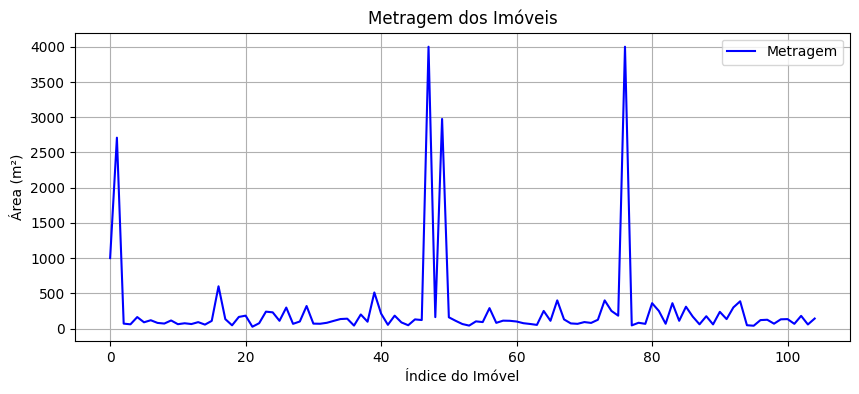

In [93]:
# Gráfico de Linha, mesmo que o lá de baixo

plt.figure(figsize=(10, 4))
plt.plot(df['Metragem(m²)'], color='blue', label='Metragem')
plt.title('Metragem dos Imóveis')
plt.xlabel('Índice do Imóvel')
plt.ylabel('Área (m²)')
plt.legend()
plt.grid(True)
plt.show()

b. Qual a média do número de quartos, banheiros e vagas?

In [94]:
media_quartos = df['Quantidade de Quartos'].mean()
media_banheiros = df['Quantidade de Banheiros'].mean()
media_vagas = df['Quantidade de Vagas'].mean()
print(f'o valor medio de banheiros é {media_banheiros}, de quartos são {media_quartos} e de vagas {media_vagas}.')

o valor medio de banheiros é 2.2527472527472527, de quartos são 2.662921348314607 e de vagas 1.9047619047619047.


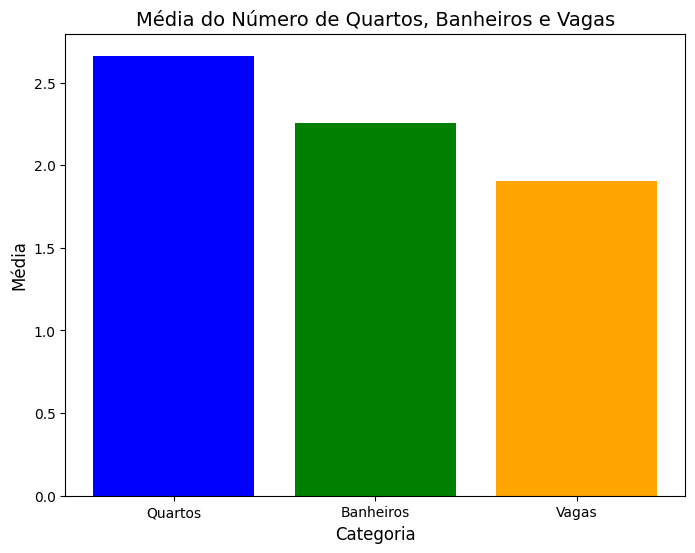

In [95]:
# Gráfico de barra

medias = {
    'Quartos': media_quartos,
    'Banheiros': media_banheiros,
    'Vagas': media_vagas
}

plt.figure(figsize=(8, 6))
plt.bar(medias.keys(), medias.values(), color=['blue', 'green', 'orange'])

plt.title('Média do Número de Quartos, Banheiros e Vagas', fontsize=14)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Média', fontsize=12)

plt.show()

c. Qual é o valor médio do IPTU e do condomínio?

In [96]:
media_iptu = df['Valor IPTU'].mean()
media_cond = df['Valor Condominio'].mean()
print(f'O valor medio do iptu é {media_iptu} e dos condominios é de {media_cond}')

O valor medio do iptu é 259.34285714285716 e dos condominios é de 221.02857142857144


IPTU

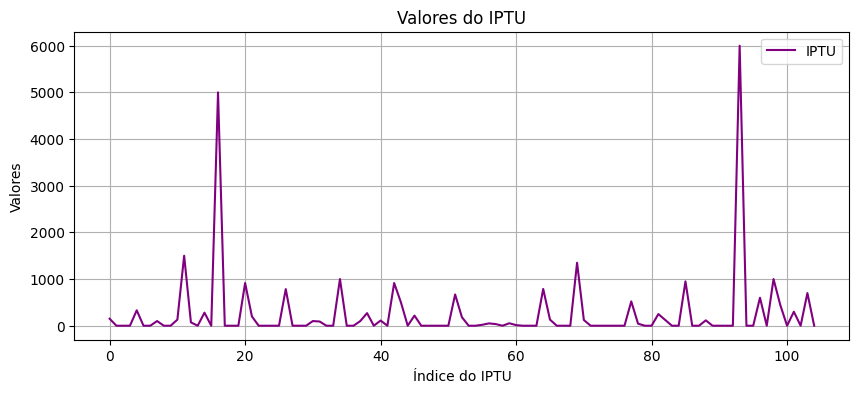

In [97]:
# Gráfico de linha

plt.figure(figsize=(10, 4))
plt.plot(df['Valor IPTU'], color='purple', label='IPTU')
plt.title('Valores do IPTU')
plt.xlabel('Índice do IPTU')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

Condomínio

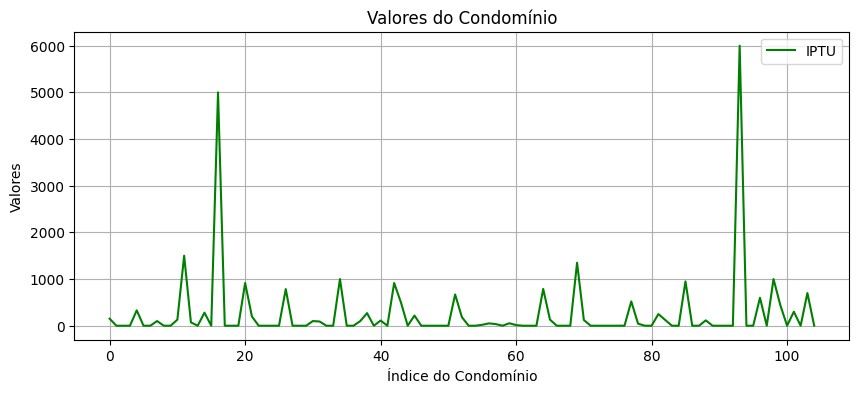

In [98]:
# Gráfico de linha

plt.figure(figsize=(10, 4))
plt.plot(df['Valor IPTU'], color='green', label='IPTU')
plt.title('Valores do Condomínio')
plt.xlabel('Índice do Condomínio')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

d. Existe alguma correlação entre o valor do imóvel e o tamanho em metros
quadrados?

In [99]:
valor_e_metragem = df[['Valor do Imóvel(R$)', 'Metragem(m²)']].corr()

print(valor_e_metragem)

                     Valor do Imóvel(R$)  Metragem(m²)
Valor do Imóvel(R$)             1.000000      0.393228
Metragem(m²)                    0.393228      1.000000


C:\Users\guitc\AppData\Local\Temp\ipykernel_9024\3124718325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='faixa_metragem', y='Valor do Imóvel(R$)', data=df, palette='Set3')


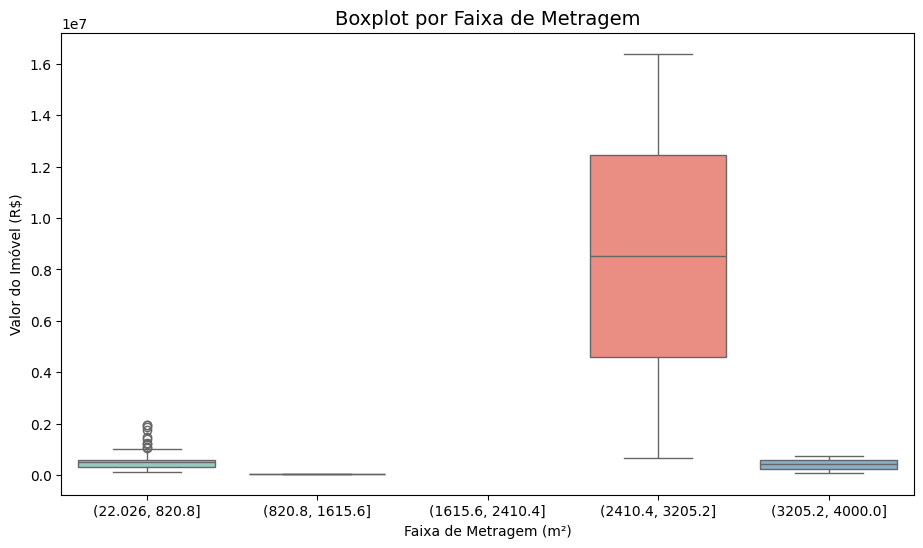

In [100]:
# Criando a faixa de metragem
df['faixa_metragem'] = pd.cut(df['Metragem(m²)'], bins=5)

plt.figure(figsize=(11, 6))

# Usando seaborn corretamente
sns.boxplot(x='faixa_metragem', y='Valor do Imóvel(R$)', data=df, palette='Set3')

plt.title("Boxplot por Faixa de Metragem", fontsize=14)
plt.xlabel("Faixa de Metragem (m²)")
plt.ylabel("Valor do Imóvel (R$)")
plt.show()

e. Imóveis maiores têm um IPTU mais alto?

In [101]:
metragem_e_iptu = df.groupby(df['Metragem(m²)'])['Valor IPTU'].sum()

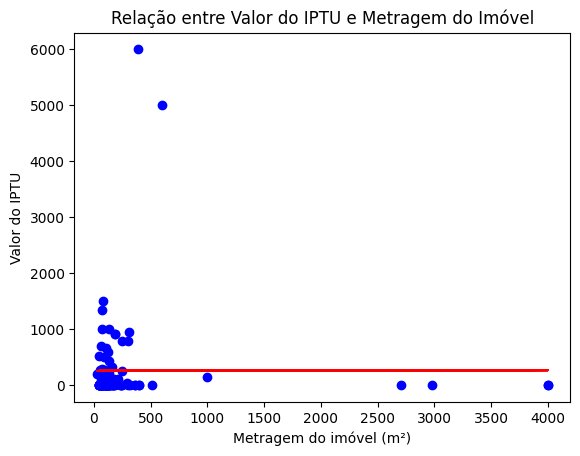

Valor do IPTU previsto para o imóvel com 80 m²: R$ 258.67


c:\Users\guitc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [102]:
# Gráfico de dispersão
X = df[['Metragem(m²)']]
y = df['Valor IPTU']

model = LinearRegression()
model.fit(X, y)  # Corrigido: colchetes → parênteses

plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')

plt.xlabel("Metragem do imóvel (m²)")
plt.ylabel("Valor do IPTU")
plt.title("Relação entre Valor do IPTU e Metragem do Imóvel")  # Corrigido: era .tile
plt.show()

# Previsão
previsao_metragem = 80
iptu_previsto = model.predict([[previsao_metragem]])
print(f"Valor do IPTU previsto para o imóvel com {previsao_metragem} m²: R$ {iptu_previsto[0]:,.2f}")

f. A quantidade de vagas de garagem está relacionada ao preço do imóvel?

In [103]:
correlacao = df['Quantidade de Vagas'].corr(df['Valor IPTU'])
print(f"Correlação entre vagas de garagem e preço do imóvel: {correlacao:.2f}")

Correlação entre vagas de garagem e preço do imóvel: 0.06


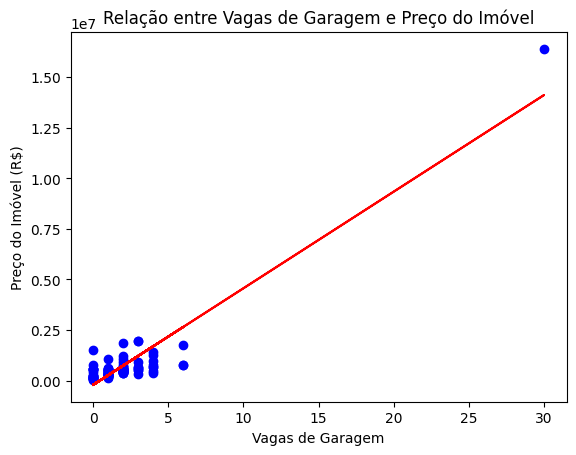

Preço previsto para um imóvel com 4 vagas: R$ 1,698,258.18


c:\Users\guitc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [104]:
# Gráfico de dispersão

X = df[['Quantidade de Vagas']]
y = df['Valor do Imóvel(R$)']

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Vagas de Garagem")
plt.ylabel("Preço do Imóvel (R$)")
plt.title("Relação entre Vagas de Garagem e Preço do Imóvel")
plt.show()

previsao_vagas = 4
valor_previsto = model.predict([[previsao_vagas]])
print(f"Preço previsto para um imóvel com {previsao_vagas} vagas: R$ {valor_previsto[0]:,.2f}")


g. Existem imóveis com valores de metros ou preço muito acima ou abaixo da média?

Metros

In [110]:
media_metragem = df['Metragem(m²)'].mean()

media_precos = df['Valor do Imóvel(R$)'].mean()

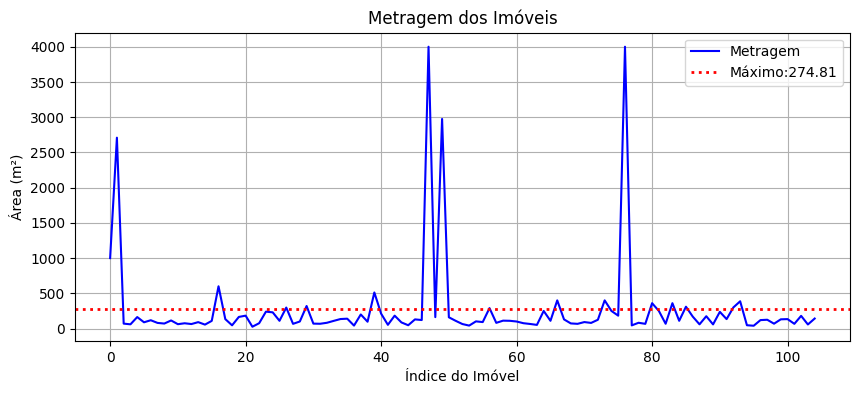

In [107]:
# Gráfico de linha

plt.figure(figsize=(10, 4))
plt.plot(df['Metragem(m²)'], color='blue', label='Metragem')
# Informações de Destaque
plt.axhline(y=media_metragem, 
            color="red", 
            linestyle=":", 
            linewidth=2, 
            label=f"Máximo:{media_metragem:.2f}")
plt.title('Metragem dos Imóveis')
plt.xlabel('Índice do Imóvel')
plt.ylabel('Área (m²)')
plt.legend()
plt.grid(True)
plt.show()

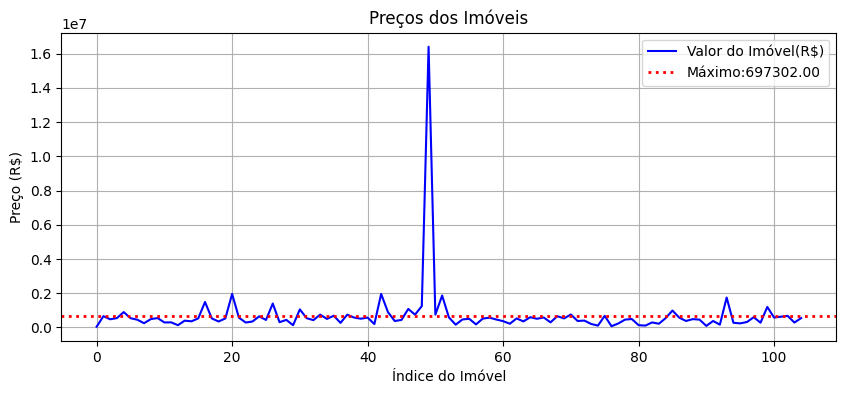

In [112]:
# Gráfico de linha

plt.figure(figsize=(10, 4))
plt.plot(df['Valor do Imóvel(R$)'], color='blue', label='Valor do Imóvel(R$)')
# Informações de Destaque
plt.axhline(y=media_precos, 
            color="red", 
            linestyle=":", 
            linewidth=2, 
            label=f"Máximo:{media_precos:.2f}")
plt.title('Preços dos Imóveis')
plt.xlabel('Índice do Imóvel')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid(True)
plt.show()

Valor

### Como interpretar o valor:

+1.0 → Correlação perfeita positiva (mais vagas → preço sempre maior)

0.0 → Nenhuma correlação linear

–1.0 → Correlação perfeita negativa (mais vagas → preço sempre menor)

#### Valores próximos de:

0.7 ou mais → Forte correlação

0.3 a 0.6 → Moderada

0.1 a 0.3 → Fraca

Menos de 0.1 → Quase nenhuma